(-5.525374367810569, 4.692732937505824)

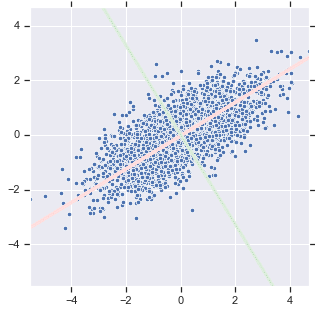

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup for figures
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.set()

# sample from multivariate normal
true_covMat = [[2,1],[1,1]]
x = np.random.multivariate_normal(mean=[0,0], cov=true_covMat, size=3000)

# compute statistics
meanVec = np.mean(x,axis=0)
centralized_x = x - meanVec
sample_covMat = np.matmul(centralized_x.transpose(), centralized_x)

# eigendecomposition
u,s,vh = np.linalg.svd(sample_covMat)

# plot samples and axis obtained by eigen decomposition
dotNum = 1000
longaxis = np.zeros((dotNum,2))
longaxis[:,0] = np.linspace(x[:,0].min(),x[:,0].max(),dotNum)
longaxis[:,1] = longaxis[:,0] * u[0,1] / u[0,0]

shortaxis = np.zeros((dotNum,2))
shortaxis[:,0] = np.linspace(x[:,0].min(),x[:,0].max(),dotNum)
shortaxis[:,1] = shortaxis[:,0] * u[1,1] / u[1,0]

sns.scatterplot(x=x[:,0],y=x[:,1])
sns.scatterplot(x=longaxis[:,0],y=longaxis[:,1],s=5,color='red', ax=ax)
sns.scatterplot(x=shortaxis[:,0],y=shortaxis[:,1],s=5,color='green', ax=ax)
ax.set_xlim(x[:,0].min(),x[:,0].max())
ax.set_ylim(x[:,0].min(),x[:,0].max())